In [58]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#weight = torch.softmax(torch.tensor([[0.6796, 0.3204],
#                       [0.4077, 0.5923]]), dim=1)
# weight = torch.rand((5, 10)) * 10
weight = nn.Parameter(torch.Tensor(torch.rand((5, 10))))
print(weight)
weight = torch.softmax(weight, dim=1)
name = 'test'

Parameter containing:
tensor([[0.4230, 0.7097, 0.3024, 0.8088, 0.4505, 0.2007, 0.0525, 0.7222, 0.8751,
         0.4320],
        [0.7118, 0.1799, 0.3894, 0.7491, 0.3876, 0.0879, 0.7124, 0.9423, 0.2627,
         0.4695],
        [0.2047, 0.6979, 0.9779, 0.2900, 0.5364, 0.5851, 0.8250, 0.7109, 0.5776,
         0.5950],
        [0.9623, 0.2397, 0.3090, 0.8699, 0.1980, 0.5953, 0.4116, 0.2818, 0.7412,
         0.9023],
        [0.4984, 0.4772, 0.3278, 0.7159, 0.5560, 0.5814, 0.4269, 0.1861, 0.6994,
         0.7760]], requires_grad=True)


KeyboardInterrupt: 

In [72]:
def plot_weights(Ws, epoch=0):
    sns.set()
    sns.set_style('white')
    plt.figure(figsize=(15, 5))
    plt.ylim([0, 1])
    x_label = ['jump', 'left_key', 'right_key', 'left_door',
               'right_door', 'stay', 'jump_door', 'left_nothing', 'right_enemy',
               'stay_nothing']
    for i, W in enumerate(Ws):
        W_ = W.detach().cpu().numpy()
        plt.bar(range(len(W_)), W_, alpha=0.5, label='C' + str(i))

    plt.xticks(range(len(x_label)),x_label)
    plt.ylabel('Weight')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.savefig('W_' +
                str(epoch) + '.png', bbox_inches='tight')
    plt.show()
    plt.close()

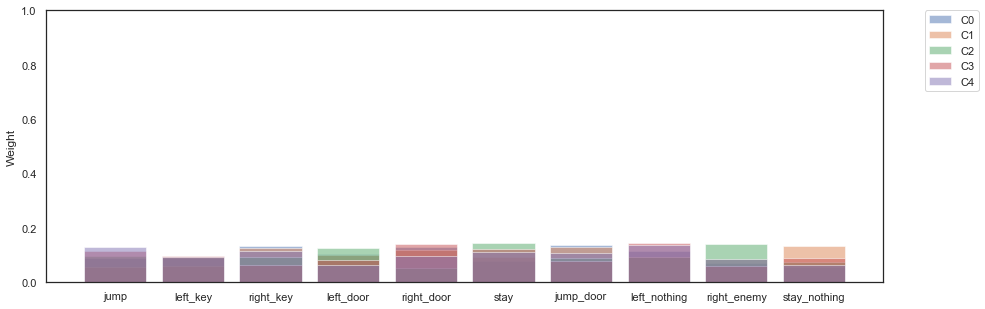

In [73]:
plot_weights(weight)